## Used Car Price Predication

#### Life Cycle of ML Project

1. Understanding the problem Statement
2. Data collection
3. Data Checks to perform
4. EDA
5. Data Preprocessing
6. Choose the best Model
7. Model Training 
8. Model Evaluation
9. Model Deployment

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv(r'E:\Arti\Projects\Sept_2025\ml-project-end-2-end\data\Used_Car_Price_Prediction.csv')

In [16]:
df.head()

,car_name,yr_mfr,fuel_type,kms_run,sale_price,city,times_viewed,body_type,transmission,variant,...,total_owners,broker_quote,original_price,car_rating,ad_created_on,fitness_certificate,emi_starts_from,booking_down_pymnt,reserved,warranty_avail
0,maruti swift,2015,petrol,8063,386399,noida,18715,hatchback,manual,lxi opt,...,2,397677,404177.0,great,2021-04-04T07:09:18.583,True,8975,57960,False,False
1,maruti alto 800,2016,petrol,23104,265499,noida,2676,hatchback,manual,lxi,...,1,272935,354313.0,great,2021-03-22T14:07:32.833,True,6167,39825,False,False
2,hyundai grand i10,2017,petrol,23402,477699,noida,609,hatchback,manual,sports 1.2 vtvt,...,1,469605,NaN,great,2021-03-20T05:36:31.311,True,11096,71655,False,False
3,maruti swift,2013,diesel,39124,307999,noida,6511,hatchback,manual,vdi,...,1,294262,374326.0,great,2021-01-21T12:59:19.299,True,7154,46200,False,False
4,hyundai grand i10,2015,petrol,22116,361499,noida,3225,hatchback,manual,magna 1.2 vtvt,...,1,360716,367216.0,great,2021-04-01T13:33:40.733,True,8397,54225,False,False


#### DataSet Information

        car_name ->	(Maruti Swift, Hyundai i10 etc ).
        yr_mfr -> Year of manufacture of the car.
        fuel_type -> Diesel, CNG etc.
        kms_run	-> Kilometers driven by the car
        body_type -> Hatchback, Sedan, SUV, etc.
        transmission -> Manual / Automatic
        car_availability -> Available/Sold
        total_owners -> 1,2,3 etc.
        original_price -> Original on-road price when the car was new.
        broker_quote -> Price quoted by broker
        car_rating	-> Rating of the car’s condition(Excellent, Good, Fair, etc.).
        fitness_certificate -> True/False
        sale_price	-> Final listed selling price of the car 
        etc.

### Data Checks
1. Missing Values
2. duplicates
3. data type
4. unique values in each column
5. statistics of dataset

In [17]:
df.isna().sum()

car_name                  0
yr_mfr                    0
fuel_type                 0
kms_run                   0
sale_price                0
city                      0
times_viewed              0
body_type               103
transmission            556
variant                   0
assured_buy               0
registered_city          10
registered_state         10
is_hot                    0
rto                       0
source                  126
make                      0
model                     0
car_availability        620
total_owners              0
broker_quote              0
original_price         3280
car_rating                9
ad_created_on             1
fitness_certificate       8
emi_starts_from           0
booking_down_pymnt        0
reserved                  0
warranty_avail            0
dtype: int64

there are lot's of missing values for original price

In [ ]:
df['original_price'] = df.groupby(['make', 'model', 'yr_mfr'])['original_price'].transform(lambda x: x.fillna(x.median()))


Use median original_price grouped by make + model + yr_mfr (since original price depends heavily on brand, model, and year).

In [24]:
def handle_missing_values(df, strategy="drop", fill_value=None):
    """Handle missing values: drop or fill."""
    if strategy == "drop":
        df = df.dropna()
    elif strategy == "fill":
        df = df.fillna(fill_value)
    elif strategy == "mean":
        df = df.fillna(df.mean(numeric_only=True))
    elif strategy == "median":
        df = df.fillna(df.median(numeric_only=True))
    elif strategy == "mode":
        for col in df.columns:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

In [25]:
df = handle_missing_values(df, strategy="median")
df = handle_missing_values(df, strategy="mode")

immpute median for continues columns and mode for categorical

In [26]:
df.isna().sum()

car_name               0
yr_mfr                 0
fuel_type              0
kms_run                0
sale_price             0
city                   0
times_viewed           0
body_type              0
transmission           0
variant                0
assured_buy            0
registered_city        0
registered_state       0
is_hot                 0
rto                    0
source                 0
make                   0
model                  0
car_availability       0
total_owners           0
broker_quote           0
original_price         0
car_rating             0
ad_created_on          0
fitness_certificate    0
emi_starts_from        0
booking_down_pymnt     0
reserved               0
warranty_avail         0
dtype: int64

In [27]:
df.duplicated().sum()

np.int64(1)

1 duplicate is there. so, we will remove it

In [29]:
df = df.drop_duplicates()

In [30]:
df.nunique()

car_name                185
yr_mfr                   24
fuel_type                 5
kms_run                7176
sale_price             4519
city                     13
times_viewed           3151
body_type                 5
transmission              2
variant                 943
assured_buy               2
registered_city         243
registered_state         16
is_hot                    2
rto                     261
source                    3
make                     27
model                   185
car_availability          4
total_owners              6
broker_quote           6536
original_price         4172
car_rating                4
ad_created_on          7398
fitness_certificate       2
emi_starts_from        4437
booking_down_pymnt     4438
reserved                  2
warranty_avail            2
dtype: int64

In [34]:
df.describe(include='integer')

,yr_mfr,kms_run,sale_price,times_viewed,total_owners,broker_quote,emi_starts_from,booking_down_pymnt
count,7399.000000,7399.000000,7.399000e+03,7399.000000,7399.000000,7.399000e+03,7399.000000,7399.000000
mean,2013.885255,62627.965130,4.548599e+05,1550.293553,1.327342,4.321754e+05,10565.262333,68229.139749
std,3.087609,43533.975544,2.827102e+05,2080.790854,0.579824,2.880403e+05,6566.651883,42406.574211
min,1996.000000,60.000000,0.000000e+00,3.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,2012.000000,31881.500000,2.811490e+05,554.500000,1.000000,2.526175e+05,6530.500000,42172.500000
50%,2014.000000,55766.000000,3.823990e+05,1088.000000,1.000000,3.610080e+05,8882.000000,57360.000000
75%,2016.000000,84187.000000,5.400990e+05,1925.000000,2.000000,5.259500e+05,12545.000000,81015.000000
max,2021.000000,996609.000000,3.866000e+06,61930.000000,6.000000,3.250000e+06,89798.000000,579901.000000


In [33]:
df.describe(include=['object'])

,car_name,fuel_type,city,body_type,transmission,variant,registered_city,registered_state,rto,source,make,model,car_availability,car_rating,ad_created_on
count,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399,7399
unique,185,5,13,5,2,943,243,16,261,3,27,185,4,4,7398
top,maruti swift,petrol,mumbai,hatchback,manual,vxi,delhi,maharashtra,mh12,inperson_sale,maruti,swift,in_stock,great,2021-03-07T10:10:19.937
freq,535,4659,1336,4461,6770,674,973,2118,380,6959,3179,535,7104,6307,2


### EDA

In [35]:
def eda_visualizations(df):
    """Perform generic EDA visualizations."""
    print("\n--- Correlation Heatmap ---")
    plt.figure(figsize=(10,6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap")
    plt.show()


    print("\n--- Distribution of Numerical Features ---")
    num_cols = df.select_dtypes(include=[np.number]).columns
    for col in num_cols:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.show()


    print("\n--- Countplot of Categorical Features ---")
    cat_cols = df.select_dtypes(include=["object", "category"]).columns
    for col in cat_cols:
        plt.figure(figsize=(6,4))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f"Countplot of {col}")
        plt.show()


--- Correlation Heatmap ---


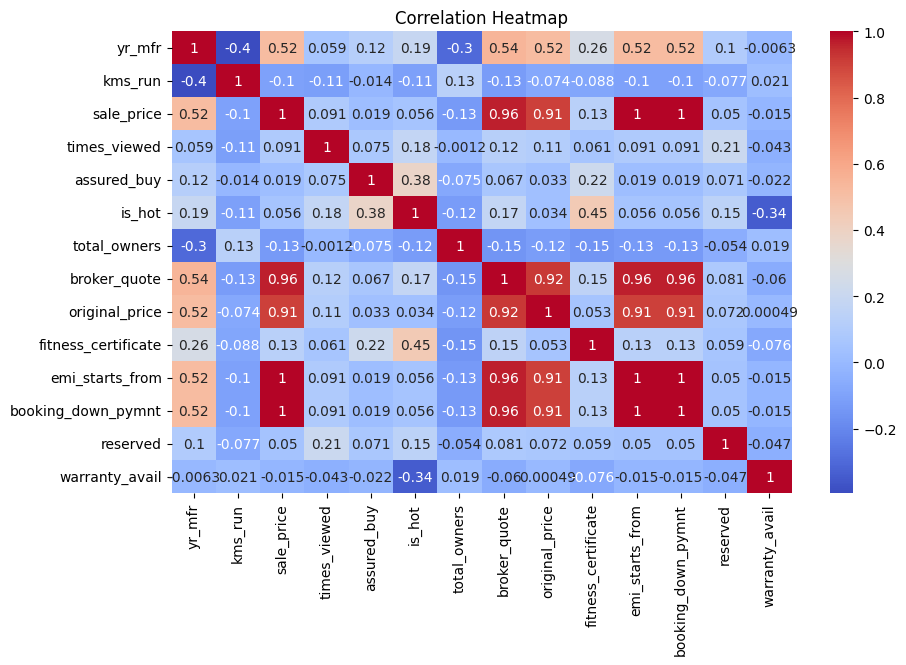


--- Distribution of Numerical Features ---


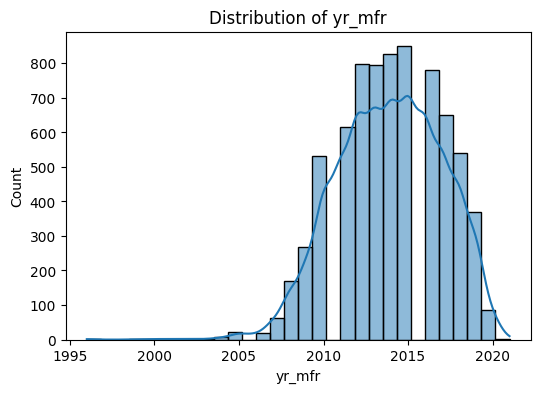

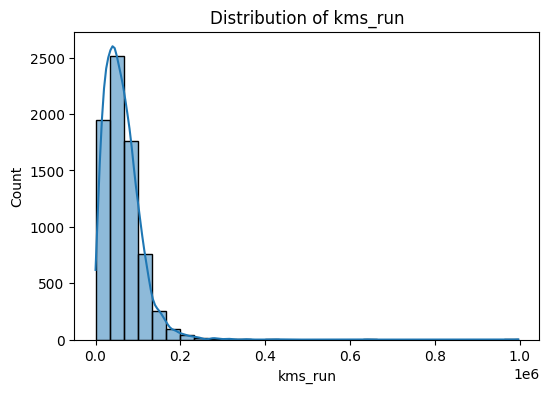

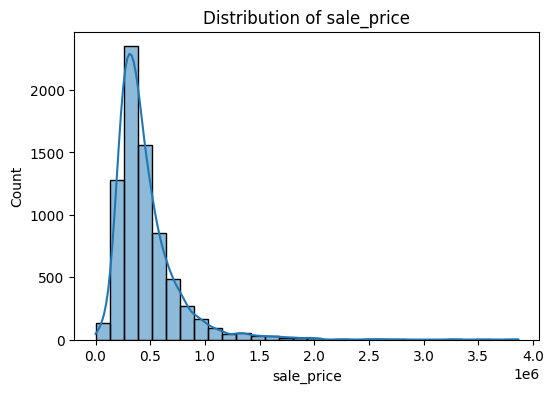

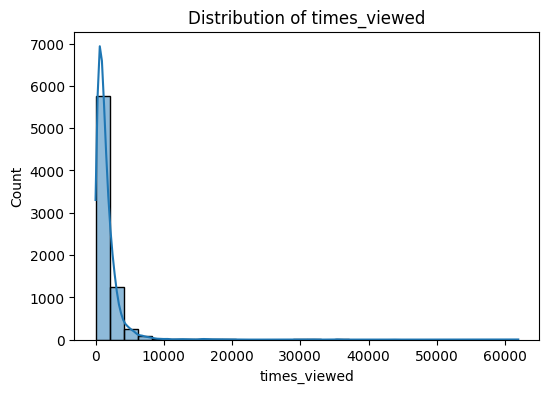

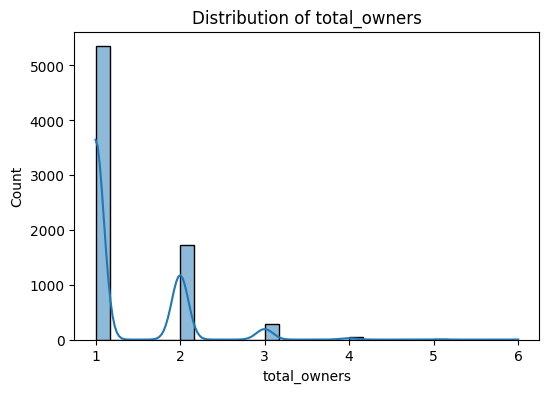

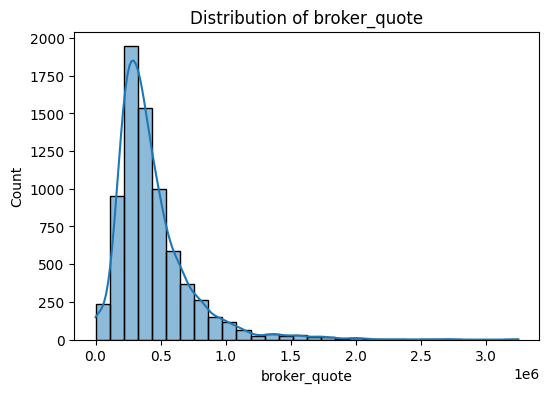

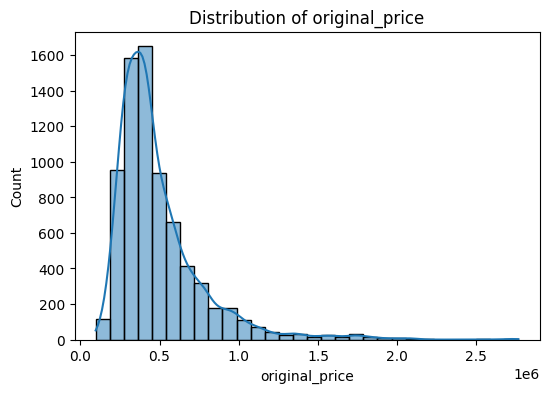

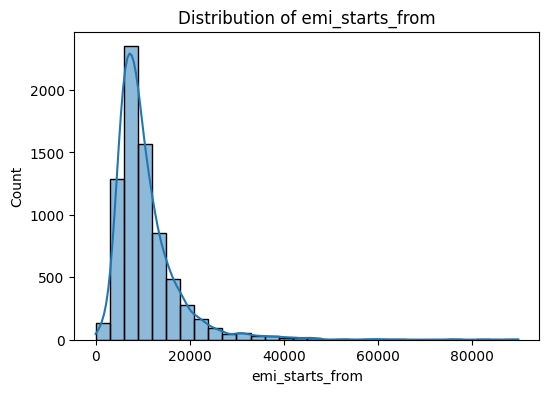

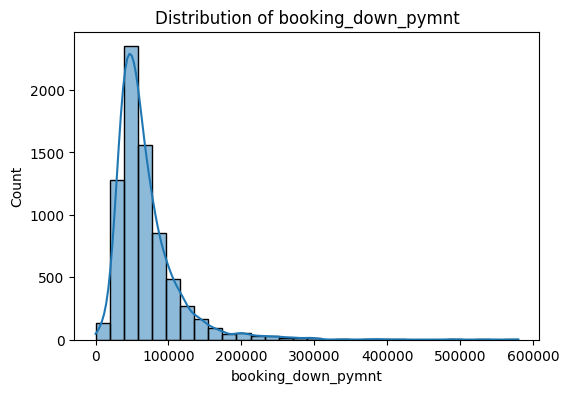


--- Countplot of Categorical Features ---


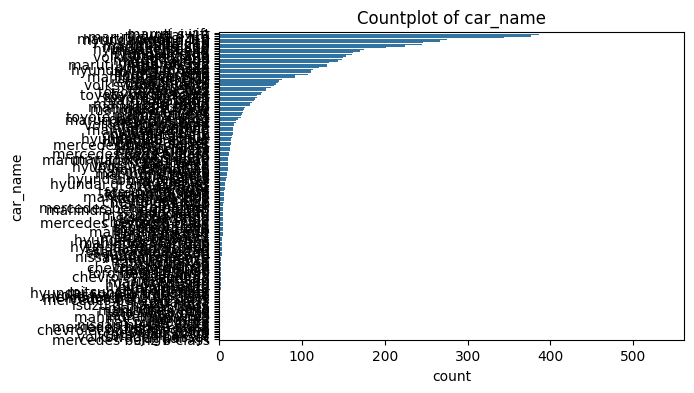

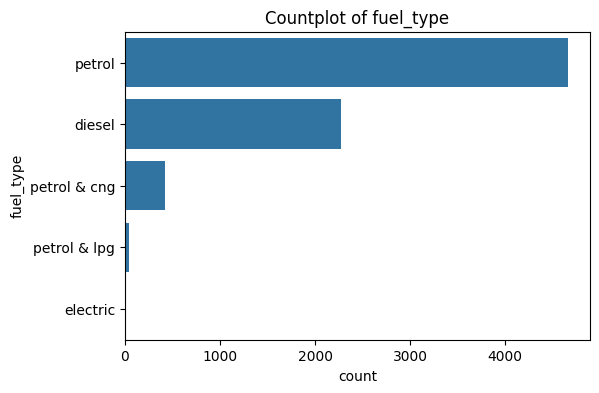

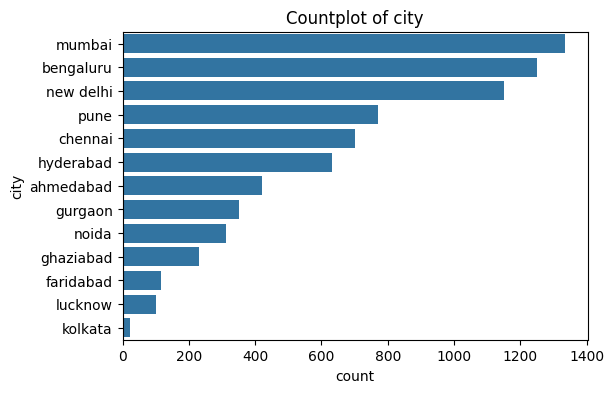

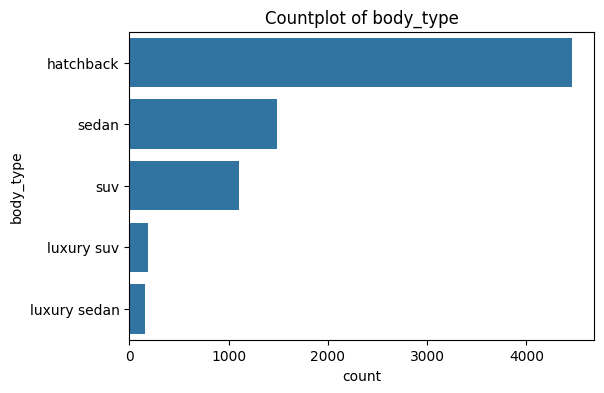

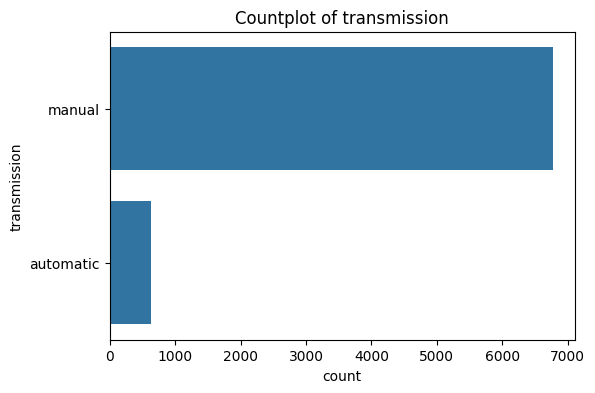

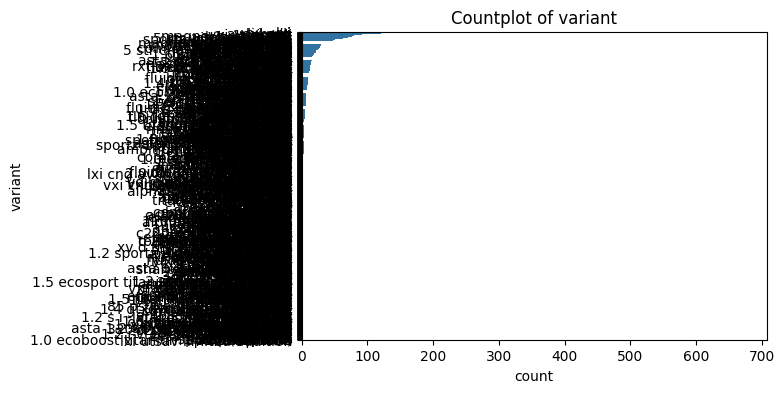

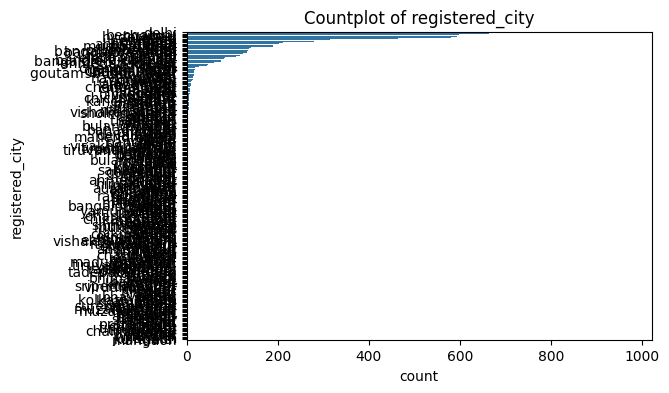

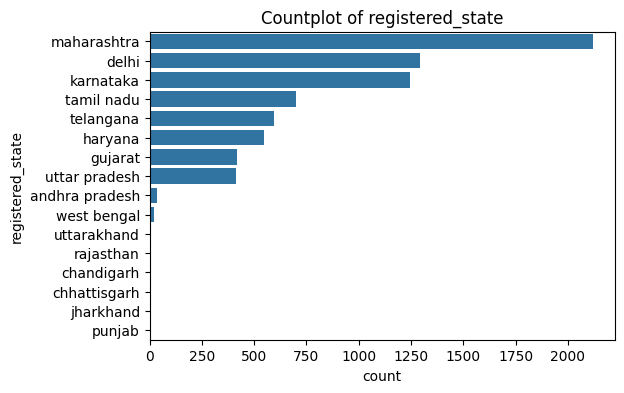

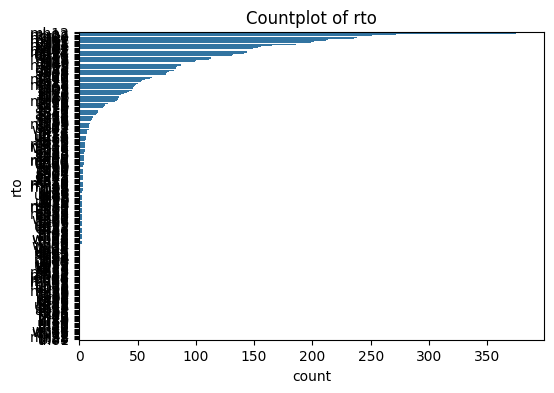

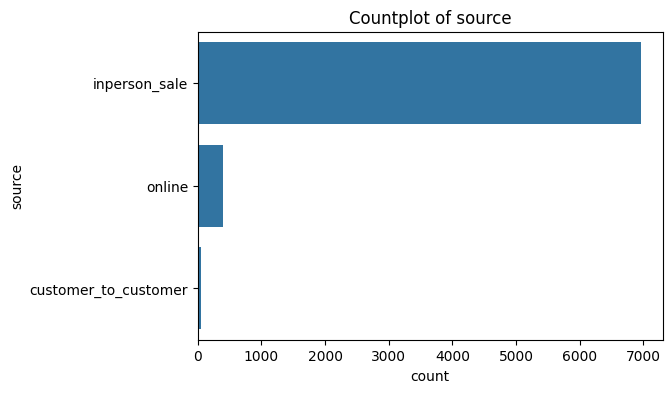

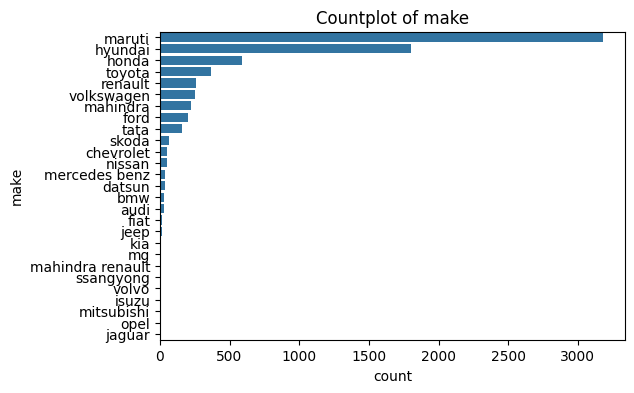

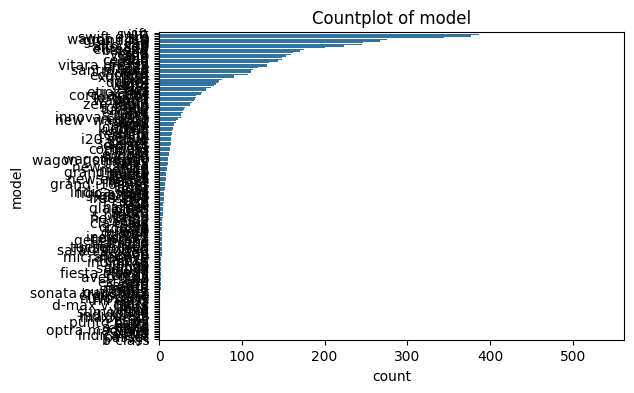

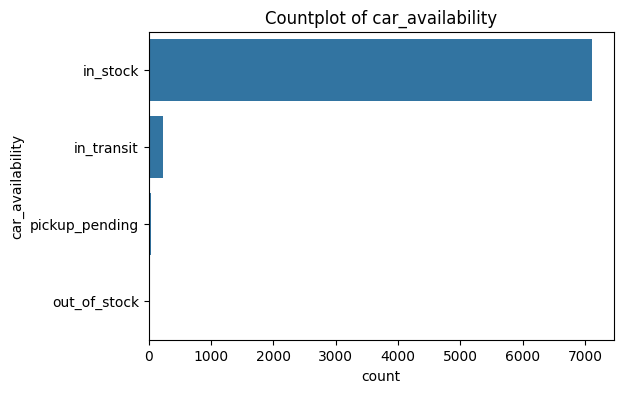

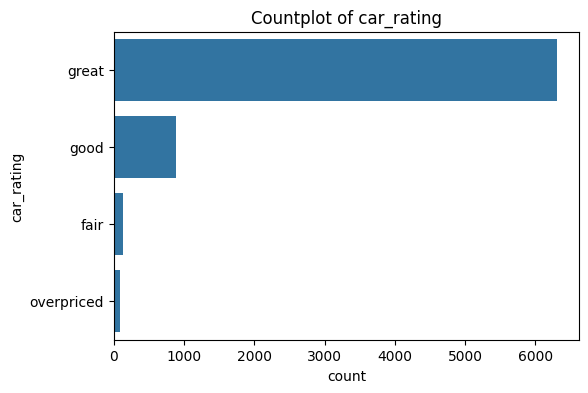

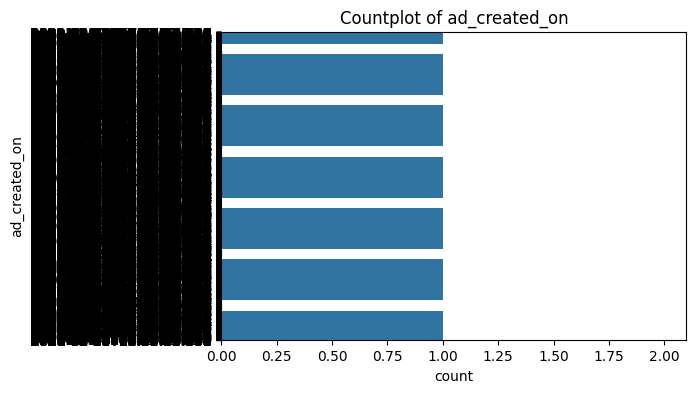

In [37]:
eda_visualizations(df)

1. mostly car's are petrol followed by deasel
2. mostly car's from maharashtra - mumbai
3. mostly manual car's are there

In [38]:
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

print("Numerical Columns:", num_cols.tolist())
print("Categorical Columns:", cat_cols.tolist())

Numerical Columns: ['yr_mfr', 'kms_run', 'sale_price', 'times_viewed', 'total_owners', 'broker_quote', 'original_price', 'emi_starts_from', 'booking_down_pymnt']
Categorical Columns: ['car_name', 'fuel_type', 'city', 'body_type', 'transmission', 'variant', 'registered_city', 'registered_state', 'rto', 'source', 'make', 'model', 'car_availability', 'car_rating', 'ad_created_on']


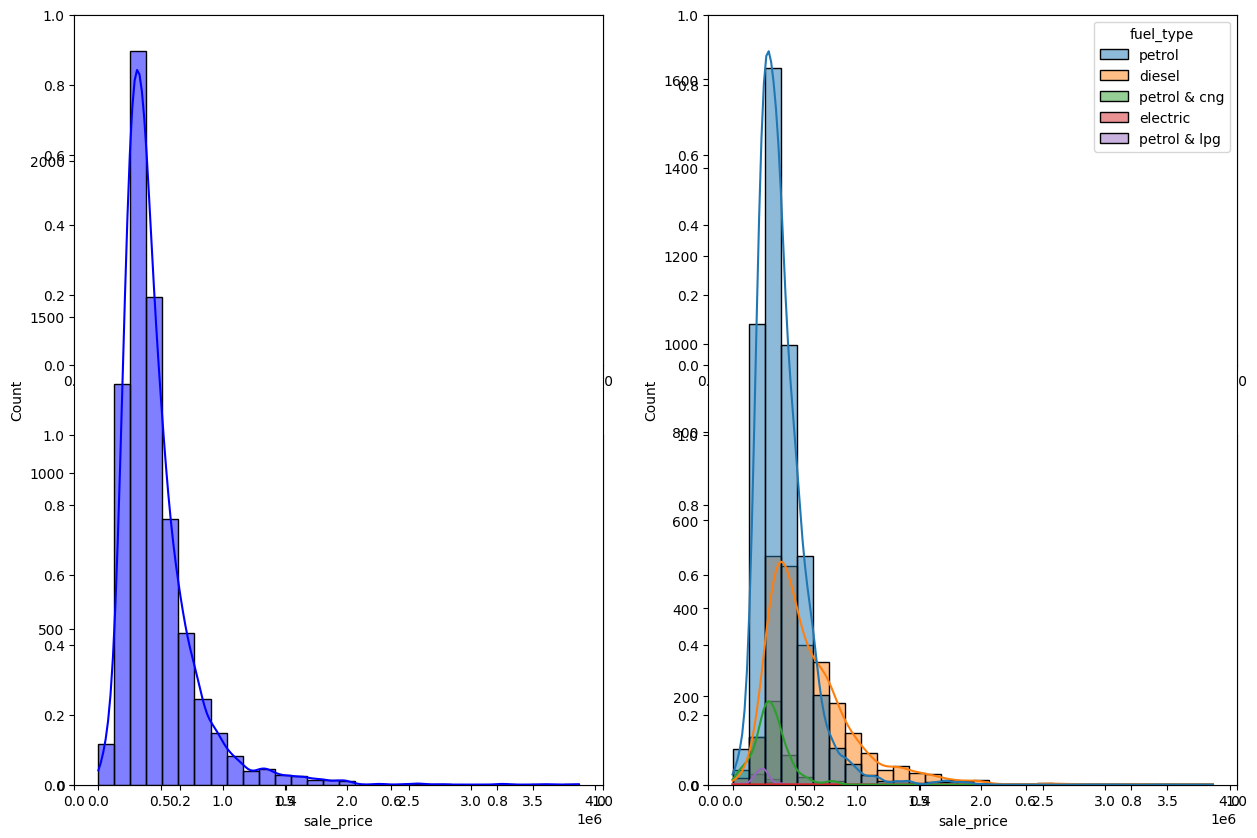

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplot(121)
sns.histplot(data=df,x='sale_price', kde=True, bins=30, color='blue')
plt.subplot(122)
sns.histplot(data=df,x='sale_price', kde=True, bins=30, color='green', hue='fuel_type')
plt.show()

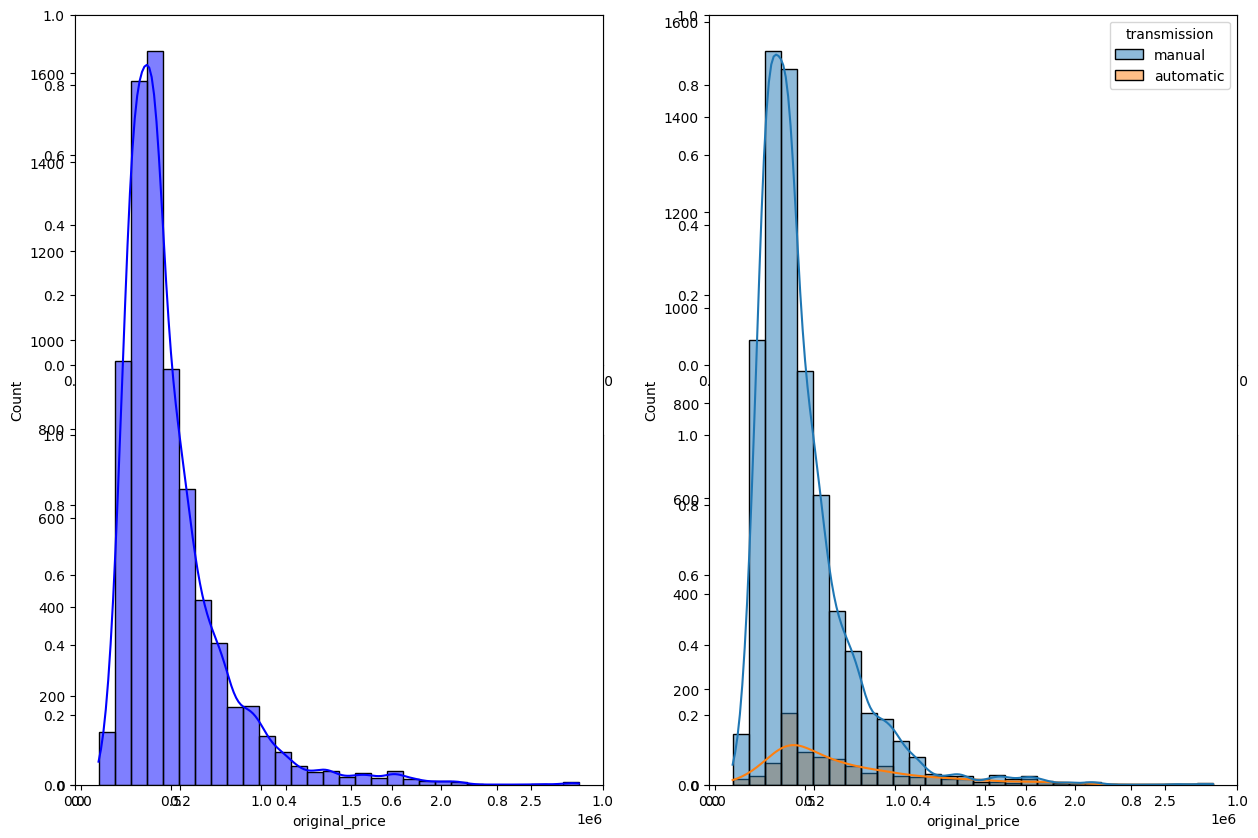

In [44]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
plt.subplot(121)
sns.histplot(data=df,x='original_price', kde=True, bins=30, color='blue')
plt.subplot(122)
sns.histplot(data=df,x='original_price', kde=True, bins=30, color='green', hue='transmission')
plt.show()

In [45]:
def bivariate_cat_num(df, target='sale_price'):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=df[col], y=df[target])
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.show()


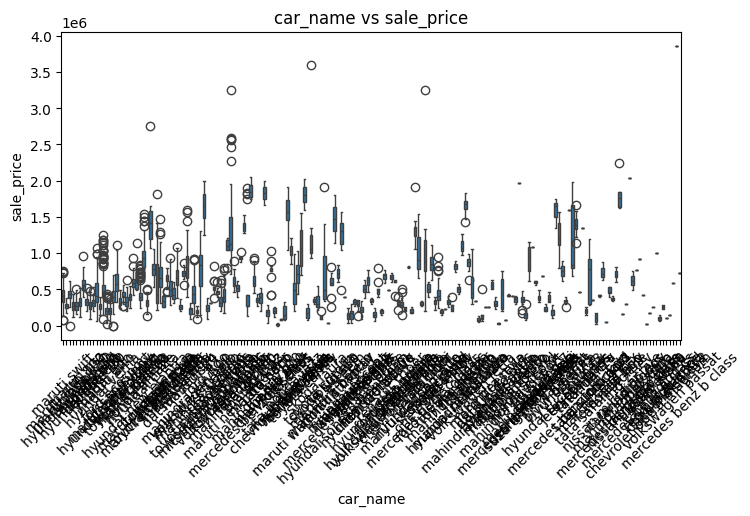

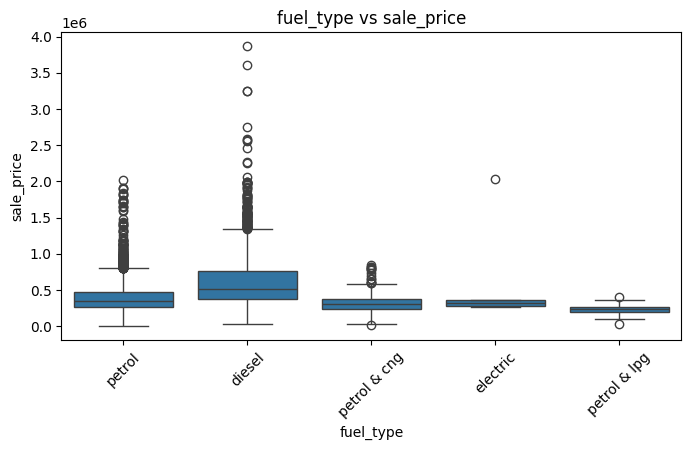

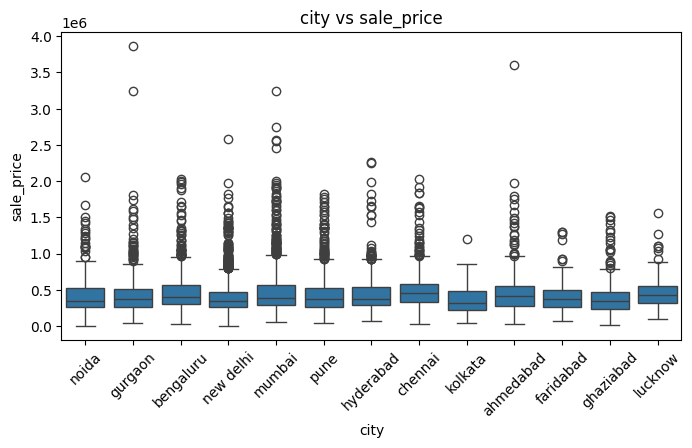

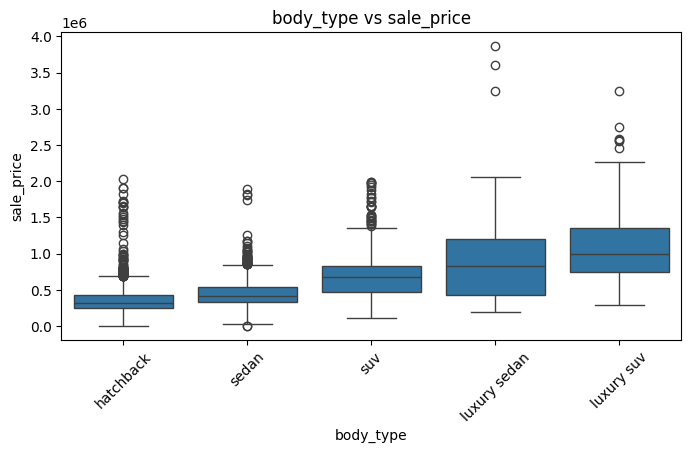

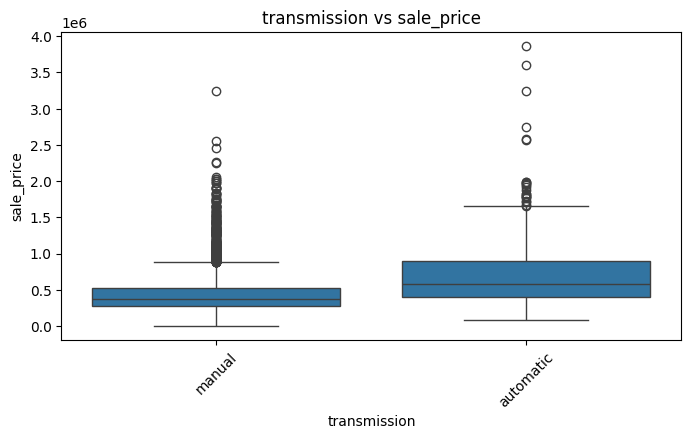

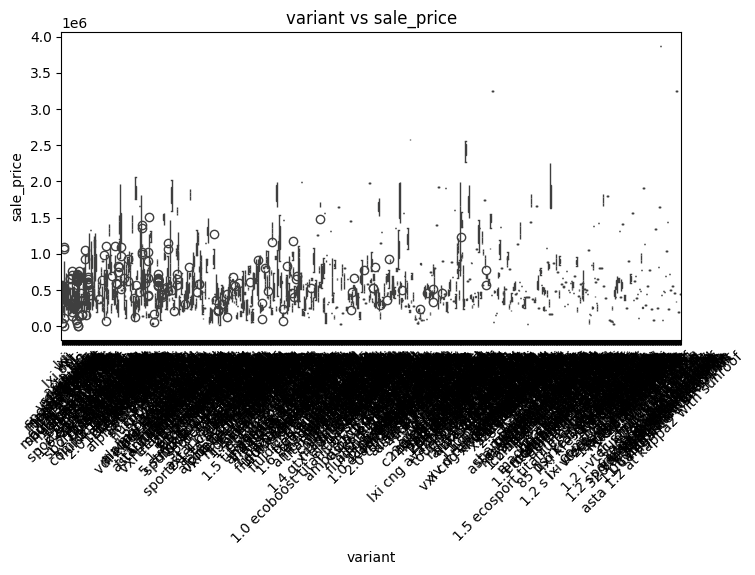

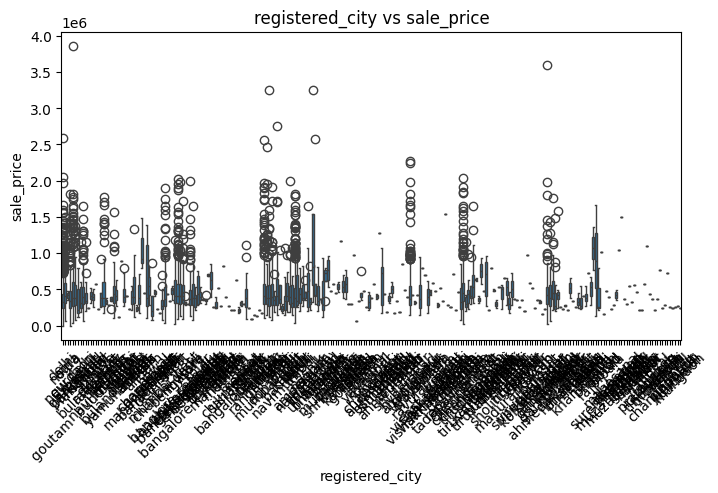

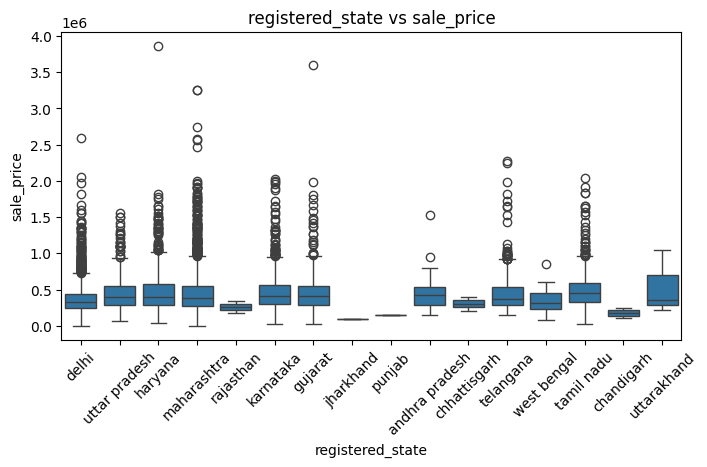

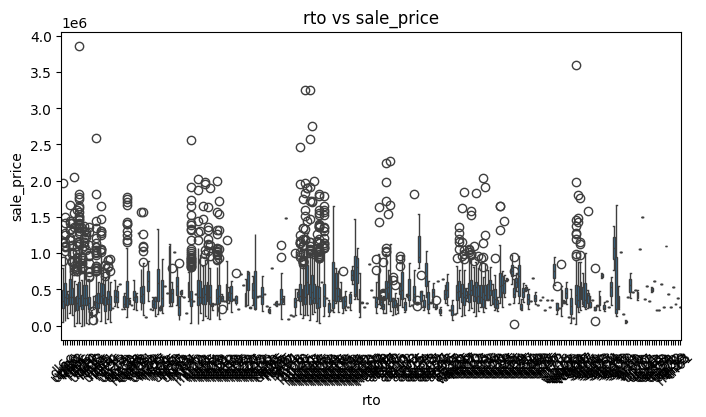

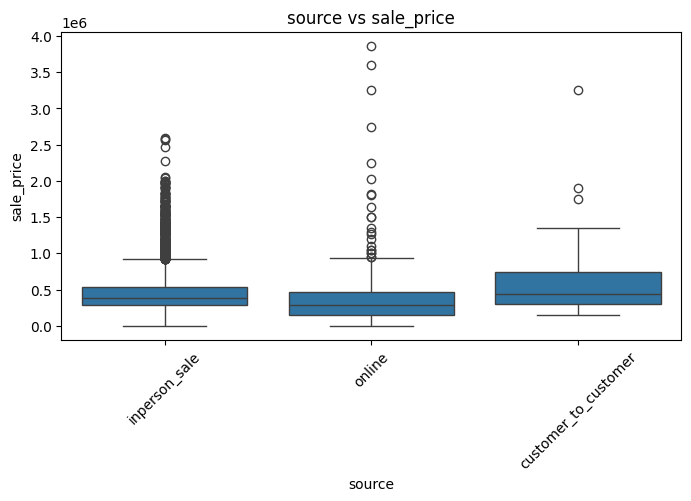

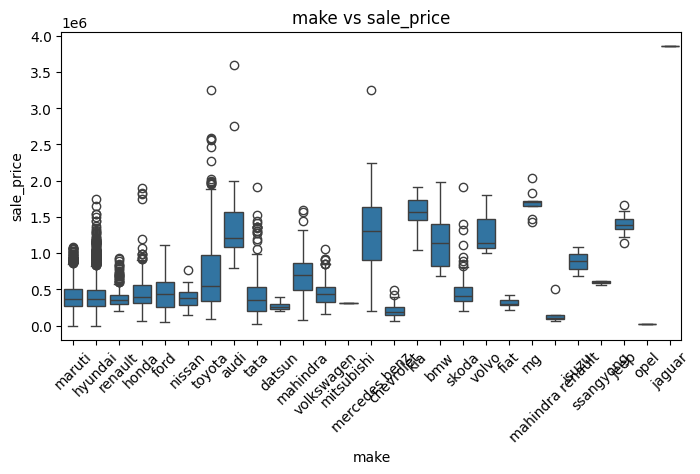

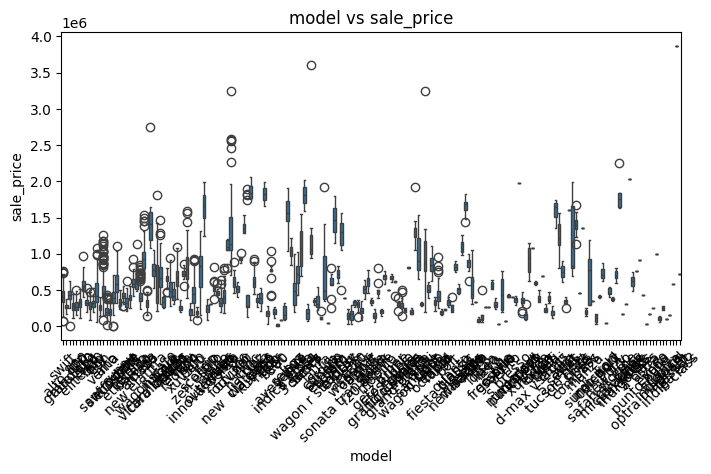

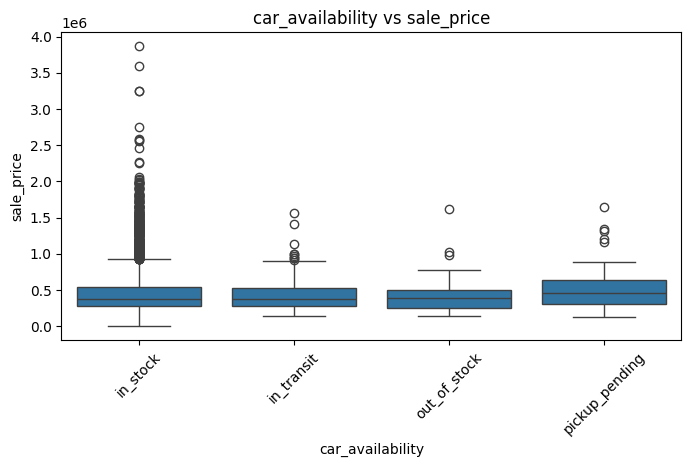

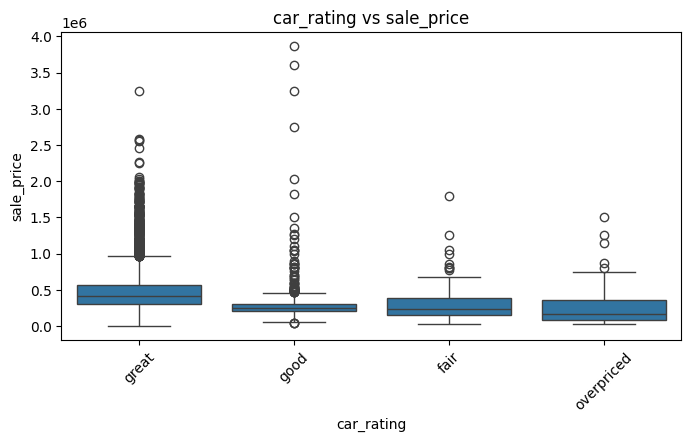

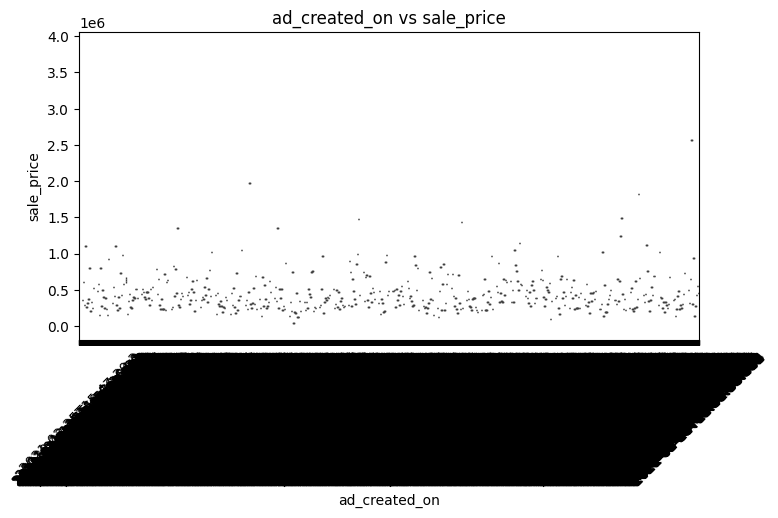

In [46]:
bivariate_cat_num(df)

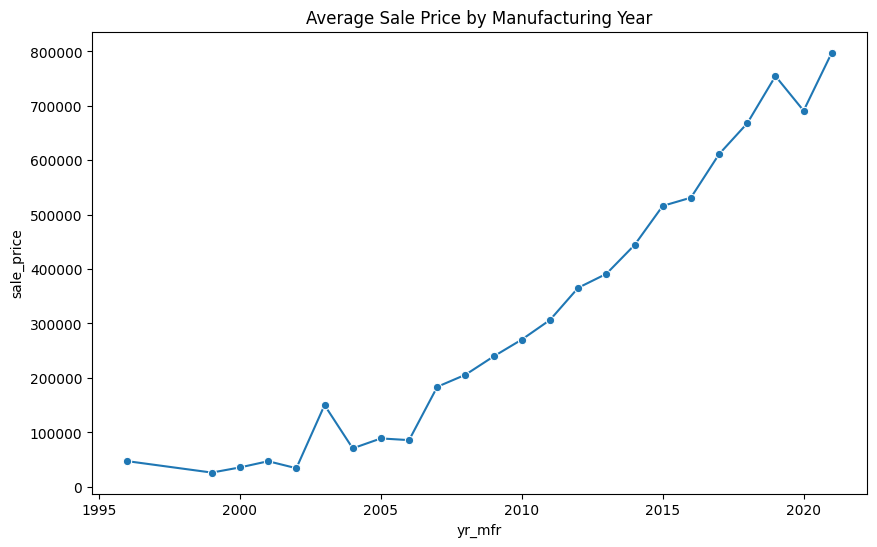

In [48]:
plt.figure(figsize=(10,6))
avg_price_by_year = df.groupby('yr_mfr')['sale_price'].mean().reset_index()
sns.lineplot(x='yr_mfr', y='sale_price', data=avg_price_by_year, marker='o')
plt.title("Average Sale Price by Manufacturing Year")
plt.show()


sales price increase as manufacture year (new car = high sales price)

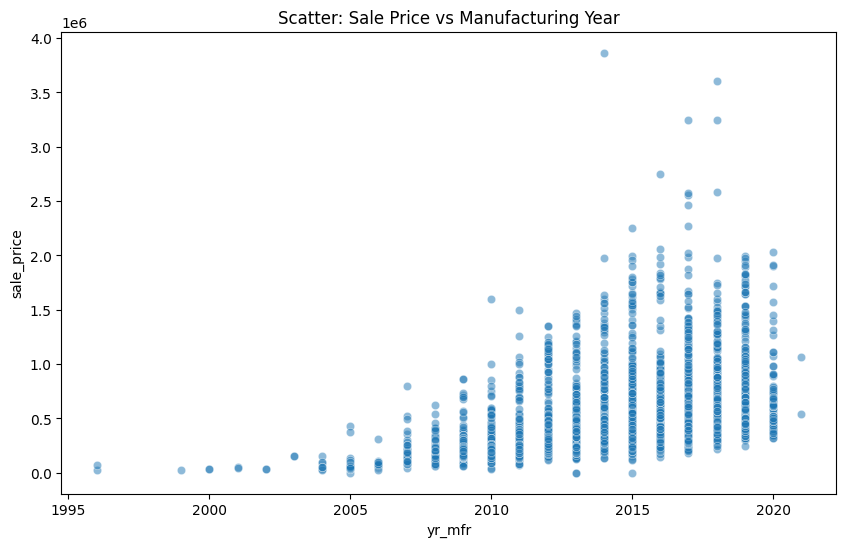

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='yr_mfr', y='sale_price', data=df, alpha=0.5)
plt.title("Scatter: Sale Price vs Manufacturing Year")
plt.show()


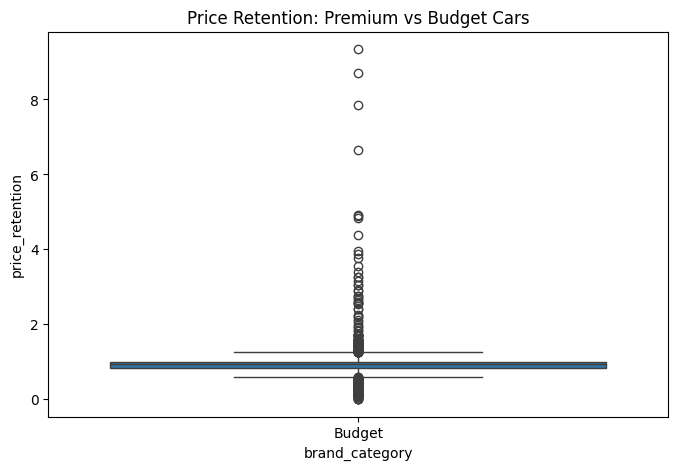

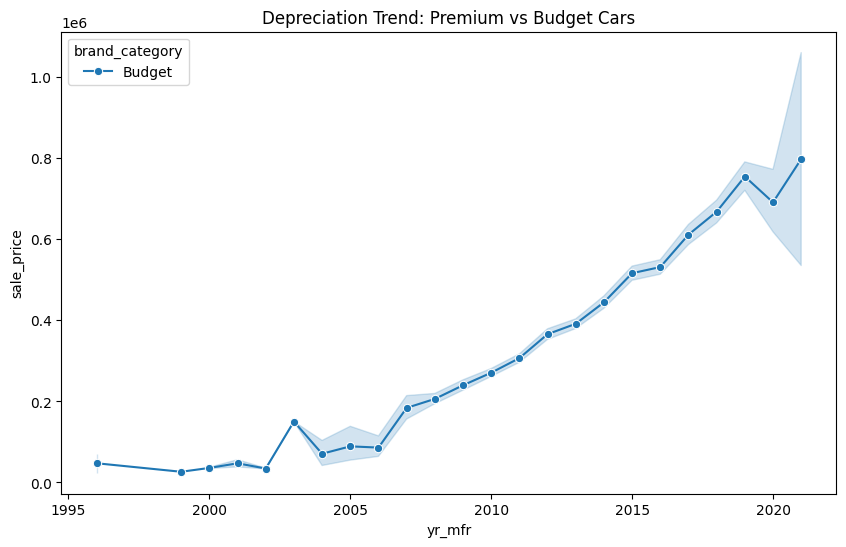

In [52]:
premium_brands = ['BMW', 'Audi', 'Mercedes-Benz', 'Jaguar', 'Volvo', 'Lexus']
df['brand_category'] = df['make'].apply(lambda x: 'Premium' if x in premium_brands else 'Budget')

# Price retention ratio (if original_price available)
df['price_retention'] = df['sale_price'] / df['original_price']

plt.figure(figsize=(8,5))
sns.boxplot(x='brand_category', y='price_retention', data=df)
plt.title("Price Retention: Premium vs Budget Cars")
plt.show()

# Depreciation trend
plt.figure(figsize=(10,6))
sns.lineplot(x='yr_mfr', y='sale_price', hue='brand_category', data=df, estimator='mean', marker='o')
plt.title("Depreciation Trend: Premium vs Budget Cars")
plt.show()


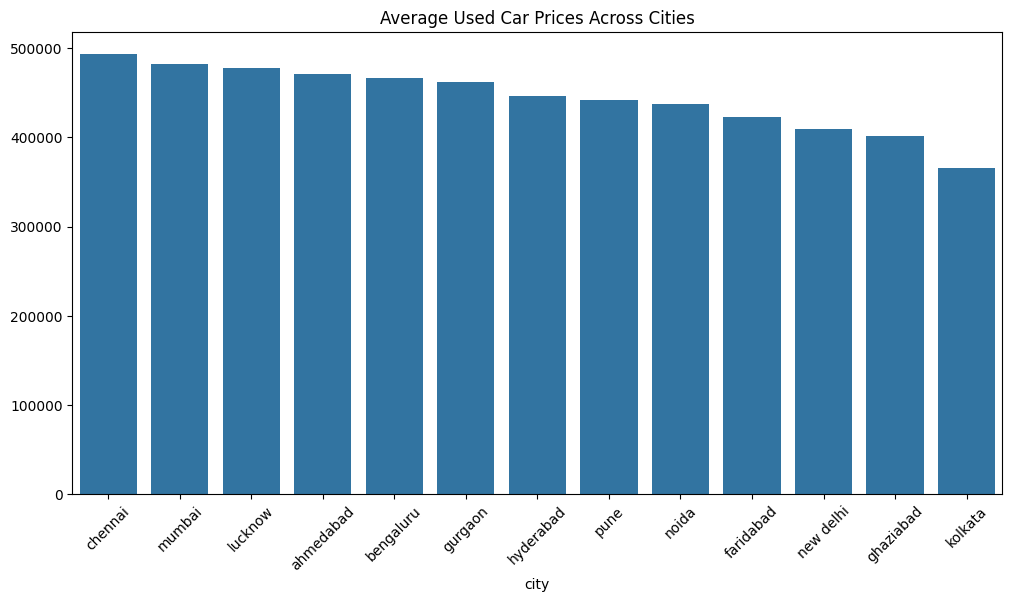

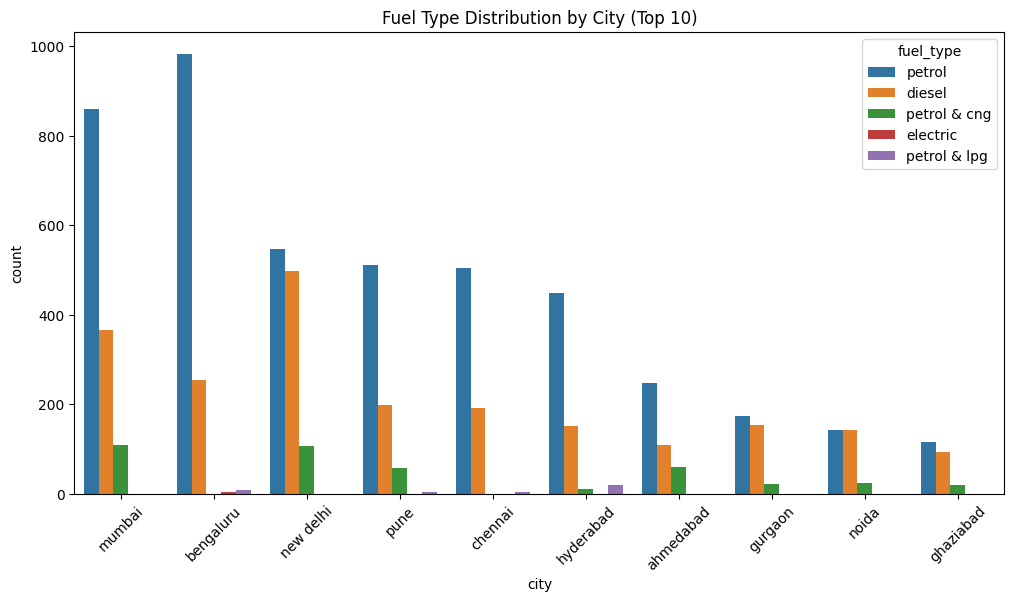

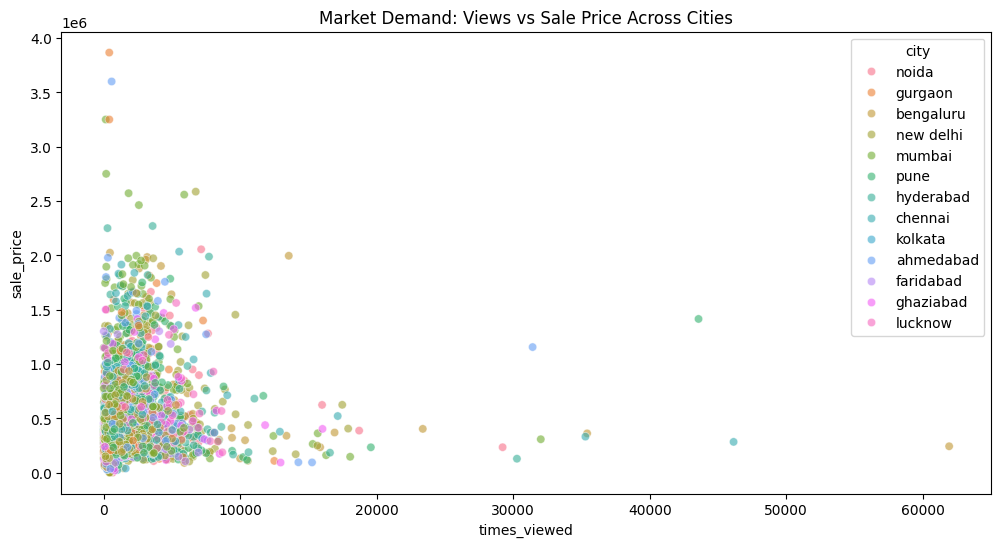

In [53]:
# Average price by city
avg_price_city = df.groupby('city')['sale_price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=45)
plt.title("Average Used Car Prices Across Cities")
plt.show()

# Fuel type distribution by city
plt.figure(figsize=(12,6))
sns.countplot(x='city', hue='fuel_type', data=df, order=df['city'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Fuel Type Distribution by City (Top 10)")
plt.show()

# Demand trend (views vs price by city)
plt.figure(figsize=(12,6))
sns.scatterplot(x='times_viewed', y='sale_price', hue='city', data=df, alpha=0.6)
plt.title("Market Demand: Views vs Sale Price Across Cities")
plt.show()


In [58]:
def pricing_strategies(df):
    # Price retention
    if 'original_price' in df.columns:
        df['price_retention'] = df['sale_price'] / df['original_price']
        plt.figure(figsize=(8,5))
        sns.boxplot(x='make', y='price_retention', data=df)
        plt.xticks(rotation=90)
        plt.title("Price Retention by Brand")
        plt.show()

    # Premium vs Budget
    premium_brands = ['BMW','Audi','Mercedes-Benz','Jaguar','Volvo','Lexus']
    df['brand_category'] = df['make'].apply(lambda x: 'Premium' if x in premium_brands else 'Budget')
    plt.figure(figsize=(8,5))
    sns.boxplot(x='brand_category', y='sale_price', data=df)
    plt.title("Pricing Strategy: Premium vs Budget Cars")
    plt.show()


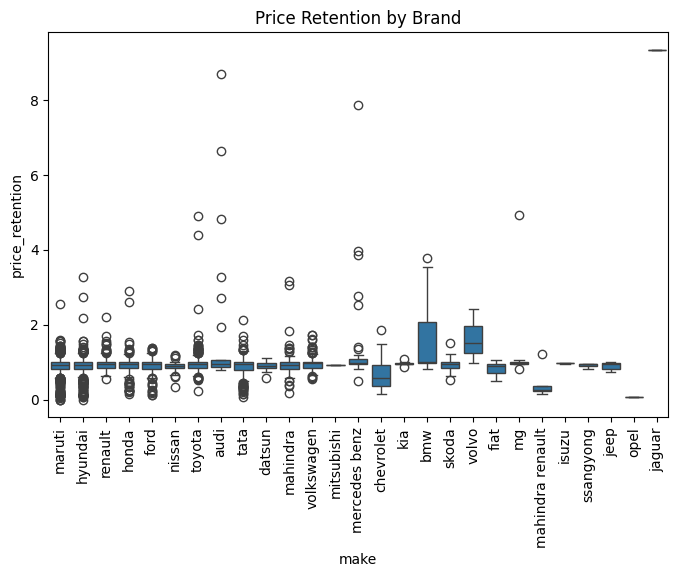

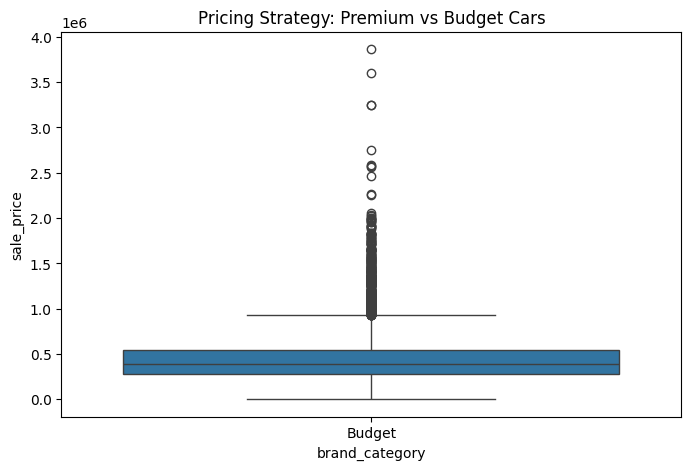

In [59]:
pricing_strategies(df)